m:  -0.05890678588065707
b:  0.4946177894824294


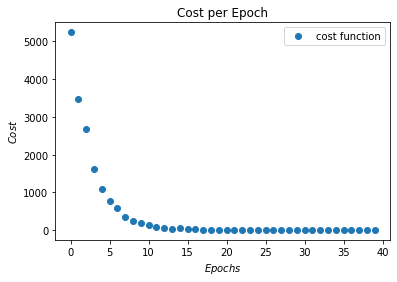

In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

class LinearGDC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d
        
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
    
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randint(1,15)
        b = np.random.randint(1,15)
        #for this 
        
        theta = np.random.randn(2,1)#self.eta_d
        learning_rate = self.eta(self.n_epochs)#not sure if one was given so i made one up
        m = len(y) #size  of daataset
        self.Js = np.zeros(self.n_epochs) # here we will hold all the epochs cost 
        #we set them to zero initially
        
        for cur_epoch in range(self.n_epochs):
            cost = 0.0
            for i in range(m):
                rand_ind = np.random.randint(0,m)
                x_i = X[rand_ind,:].reshape(1,X.shape[1])
                y_i = y[rand_ind].reshape(1,1)
                prediction = np.dot(x_i, theta)
                
                theta = theta - (1/m)*learning_rate*( x_i.T.dot((prediction - y_i)) )
                
                m_i = len(y_i)
                predictions = x_i.dot(theta)
                cost += (1/2*m_i) * np.sum(np.square(predictions-y_i))
            self.Js[cur_epoch] = cost
        print("m: ",theta[0][0])
        print("b: ",theta[1][0])
        self.coef_ = theta[0][0]
        self.intercept_ = theta[1][0]
        return self
    
    def plot_cost(self):
        plt.plot(range(self.n_epochs), self.Js, 'o', label = 'cost function')
        plt.xlabel('$Epochs$')
        plt.ylabel('$Cost$')
        plt.title('Cost per Epoch')
        plt.legend()
        plt.show()
    
    # output the distance between X and the boundary
    def decisionfunction(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]
    # output the predicted class
    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)
    
# We will use iris dataset in this example
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

# you can pick another value for C
C=0.001
svm_clf = LinearGDC(C=C, eta0 = 10, eta_d = 1000, n_epochs=40, random_state=2)
svm_clf.fit(X, y)
svm_clf.plot_cost()